# Problem Statement:

# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing Required Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [3]:
df=pd.read_csv("Advertising.csv") 
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA:

In [6]:
df.shape

(200, 4)

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

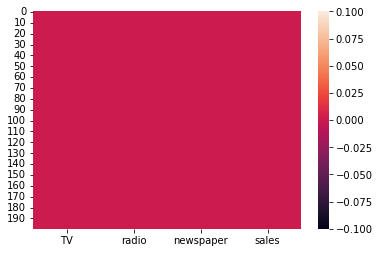

In [11]:
sns.heatmap(df.isnull())

# Data Visualization:

<AxesSubplot:xlabel='TV', ylabel='Density'>

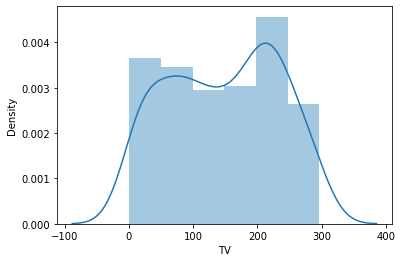

In [12]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

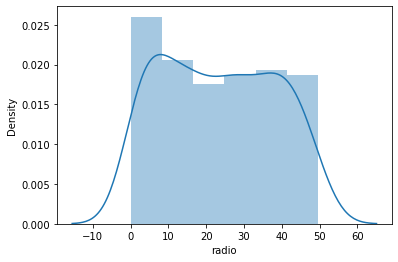

In [13]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

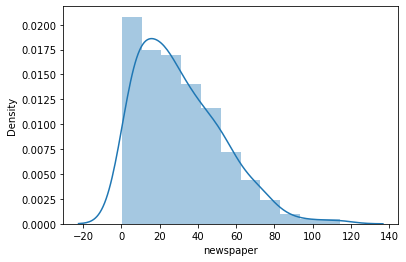

In [14]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

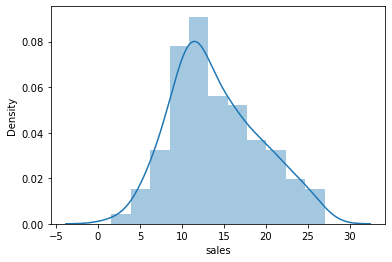

In [15]:
sns.distplot(df["sales"])

<AxesSubplot:xlabel='TV', ylabel='sales'>

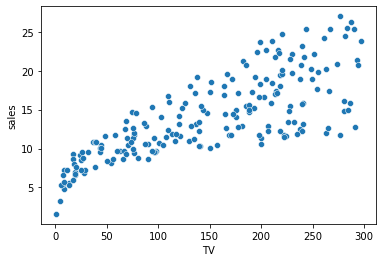

In [4]:
sns.scatterplot(x='TV',y='sales',data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

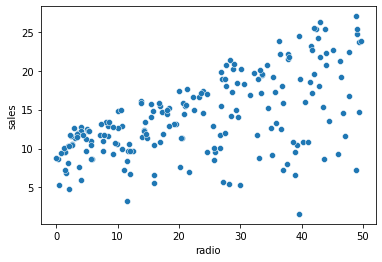

In [5]:
sns.scatterplot(x='radio',y='sales',data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

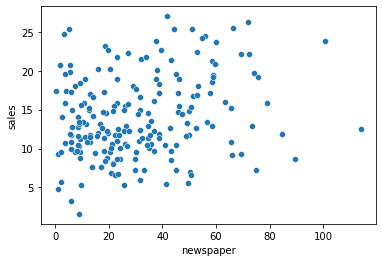

In [6]:
sns.scatterplot(x='newspaper',y='sales',data=df)

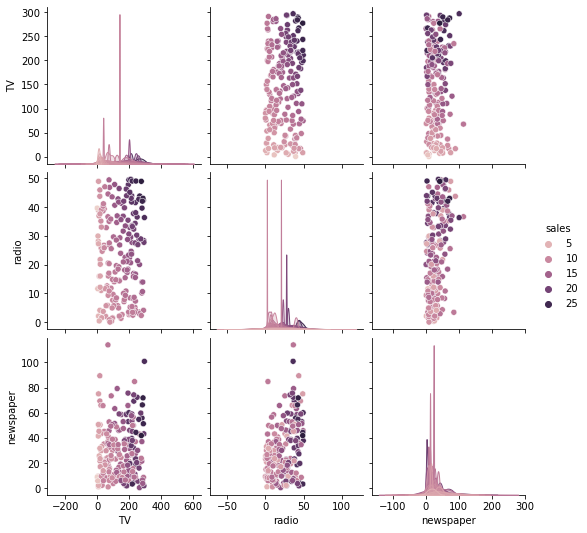

In [16]:
sns.pairplot(df,hue="sales")

# Checking for Outliers:

<AxesSubplot:>

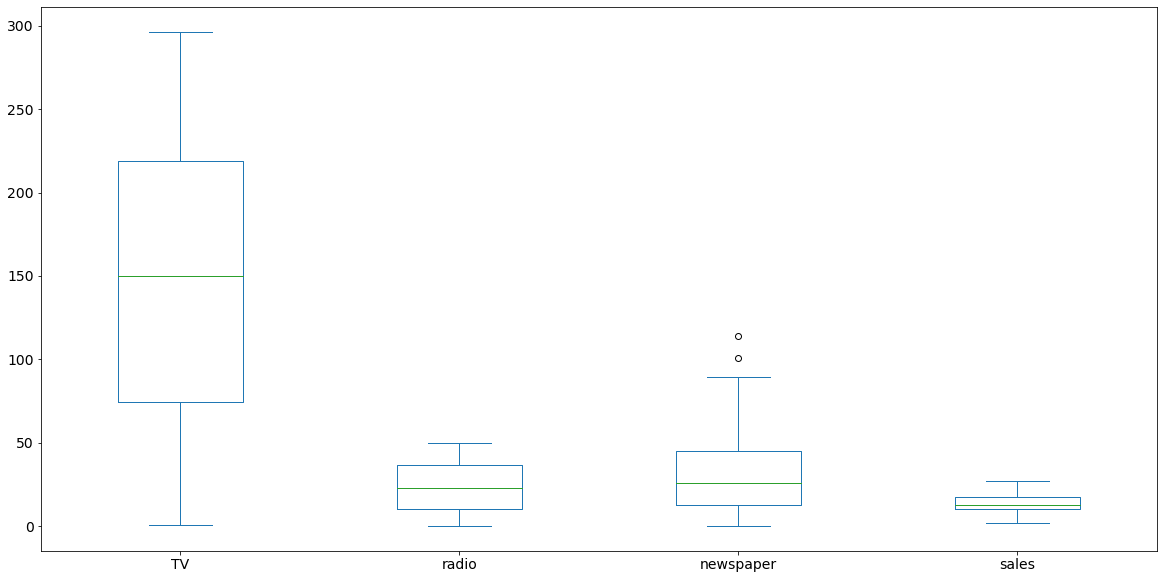

In [17]:
df.plot(kind='box',fontsize=14,figsize=(20,10))

# Removing Outliers:

In [18]:
col=df[['newspaper']]

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(col))
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
df.shape

(200, 4)

In [21]:
df_new.shape

(198, 4)

# Percentage of Dataloss:

In [22]:
Dataloss=(((200-198)/200)*100)

In [23]:
Dataloss

1.0

# Skewness:

In [24]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

# Removing Skewness:

In [25]:
sk=['newspaper']

In [26]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [27]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

In [28]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

# Correlation:

In [29]:
df_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.038288,0.779121
radio,0.051978,1.000000,0.296570,0.576748
newspaper,0.038288,0.296570,1.000000,0.191387
sales,0.779121,0.576748,0.191387,1.000000


<AxesSubplot:>

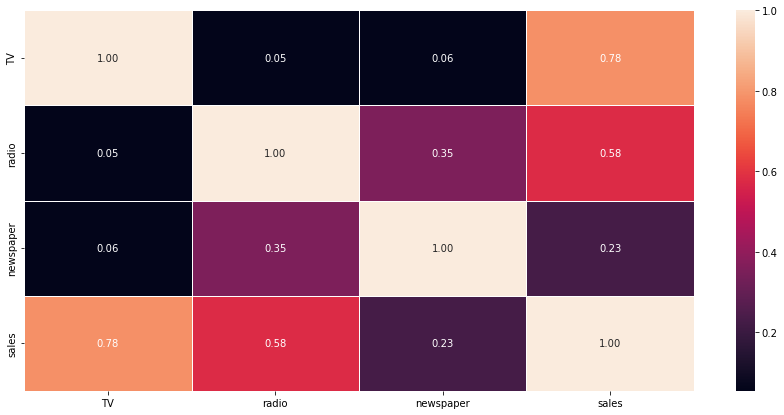

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Data Preprocessing:

In [31]:
x=df_new.drop('sales',axis=1)
y=df_new['sales']

# Scaling:

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mms=MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x),columns=x.columns)
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


In [35]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Finding Best Accuracy:

In [38]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("r2 Score is: ",maxAccu,"on Random_state: ",maxRS)

r2 Score is:  0.9358346827439895 on Random_state:  90


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.20)

# Random Forest Regressor:

In [39]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('r2_score is ',acc)

r2_score is  0.9769751976818883


# Decision Tree Regressor:

In [40]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('r2_score is ',acc)

r2_score is  0.958383976560081


# K-Neighbors Regressor:

In [41]:
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
acc=r2_score(y_test,pred)
print('r2_score is ',acc)

r2_score is  0.9086565950190172


# SupportVectorRegressor:

In [44]:
SVR=SVR()
SVR.fit(x_train,y_train)
pred=SVR.predict(x_test)
acc=r2_score(y_test,pred)
print('r2_score is ',acc)

r2_score is  0.8768448970914282


# Cross Validation:

In [47]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(RFR,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  97.22535938649929
at cv=  3
cross val score =  97.43408183735397
at cv=  4
cross val score =  97.72388104378385
at cv=  5
cross val score =  97.61509559775939
at cv=  6
cross val score =  97.67914233857132
at cv=  7
cross val score =  97.66585022659407


In [48]:
print(cross_val_score(RFR,x,y,cv=4).mean())

0.9773520338699393


In [49]:
print(cross_val_score(DTR,x,y,cv=4).mean())

0.9394462457703857


In [50]:
print(cross_val_score(KN,x,y,cv=4).mean())

0.9458648691885585


In [52]:
print(cross_val_score(SVR,x,y,cv=4).mean())

0.9067206365371158


So by seeing the Cross validation score and model r2_score we can say that the RandomForestRegressor is the best model.

# Hyperparameter Tuning:

In [53]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7],'criterion':['mse','poisson']}
GCV=GridSearchCV(RFR,parameters,cv=4,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto'}

In [54]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9302265353240962

# Saving the Model:

In [55]:
import pickle
filename='Advt_sales_channel_pred.pkl'
pickle.dump(RFR, open(filename,'wb'))